<a href="https://colab.research.google.com/github/Siddhi2402/Feature-Engineering-Lab/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. IMPORT LIBRARIES
# =====================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
df = pd.read_csv("movies_cleaned.csv")  # change filename if needed
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# =====================================
# 3. SELECT FEATURES & TARGET
# =====================================
features = [
    "budget",
    "popularity",
    "revenue",
    "runtime",
    "vote_count"
]

X = df[features]
y = (df["vote_average"] >= 7).astype(int)


In [ ]:
# 4. SAFETY CHECK (VERY IMPORTANT)
# =====================================
X = X.fillna(X.mean())



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# =====================================
# 6. BEFORE NORMALIZATION
# =====================================
print("\n===== BEFORE NORMALIZATION =====")

print("\nRaw feature values:")
print(X_train.head())

# Z-score just for observation
z_before = (X_train - X_train.mean()) / X_train.std()
print("\nZ-score (Before StandardScaler):")
print(z_before.head())

model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_train, y_train)

y_pred_before = model_before.predict(X_test)

print("\nPrecision (Before):", precision_score(y_test, y_pred_before))
print("Recall (Before):", recall_score(y_test, y_pred_before))
print("F1 Score (Before):", f1_score(y_test, y_pred_before))





===== BEFORE NORMALIZATION =====

Raw feature values:
        budget  popularity   revenue  runtime  vote_count
4687         0    1.948435         0     86.0          34
2951  11000000   36.319205  32935319    105.0         834
4071   2000000   41.298723  78898765    115.0         760
4579    400000   64.782984   5028948     91.0        1708
2197  20000000   19.220789  30426096    106.0         671

Z-score (Before StandardScaler):
        budget  popularity   revenue   runtime  vote_count
4687 -0.715687   -0.624019 -0.500052 -0.905958   -0.541823
2951 -0.439233    0.487748 -0.298263 -0.078983    0.135549
4071 -0.665423    0.648817 -0.016652  0.356268    0.072892
4579 -0.705634    1.408446 -0.469241 -0.688333    0.875578
2197 -0.213043   -0.065322 -0.313637 -0.035458   -0.002466

Precision (Before): 0.6712328767123288
Recall (Before): 0.24873096446700507
F1 Score (Before): 0.362962962962963


In [ ]:
# =====================================
# 7. APPLY STANDARD SCALER
# =====================================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# =====================================
# 8. AFTER NORMALIZATION
# =====================================
print("\n===== AFTER NORMALIZATION =====")

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
print("\nStandardized feature values:")
print(X_train_scaled_df.head())

model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_train_scaled, y_train)

y_pred_after = model_after.predict(X_test_scaled)

print("\nPrecision (After):", precision_score(y_test, y_pred_after))
print("Recall (After):", recall_score(y_test, y_pred_after))
print("F1 Score (After):", f1_score(y_test, y_pred_after))




===== AFTER NORMALIZATION =====

Standardized feature values:
     budget  popularity   revenue   runtime  vote_count
0 -0.715780   -0.624100 -0.500118 -0.906076   -0.541894
1 -0.439290    0.487812 -0.298302 -0.078993    0.135567
2 -0.665509    0.648902 -0.016654  0.356314    0.072902
3 -0.705726    1.408629 -0.469302 -0.688423    0.875692
4 -0.213070   -0.065331 -0.313677 -0.035462   -0.002466

Precision (After): 0.735632183908046
Recall (After): 0.3248730964467005
F1 Score (After): 0.4507042253521127


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
df = pd.read_csv("movies_cleaned.csv", engine='python')

features = [
    "budget",
    "popularity",
    "revenue",
    "runtime",
    "vote_count"
]

X = df[features]
y = (df["vote_average"] >= 7).astype(int)

# safety (even if you believe no NaNs)
X = X.fillna(X.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_train, y_train)

y_pred_before = model_before.predict(X_test)

print("=== BEFORE MIN-MAX ===")
print("Precision:", precision_score(y_test, y_pred_before))
print("Recall:", recall_score(y_test, y_pred_before))
print("F1 Score:", f1_score(y_test, y_pred_before))

=== BEFORE MIN-MAX ===
Precision: 0.6712328767123288
Recall: 0.24873096446700507
F1 Score: 0.362962962962963


In [ ]:
scaler = MinMaxScaler()

X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [ ]:
model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_train_mm, y_train)

y_pred_after = model_after.predict(X_test_mm)

print("\n=== AFTER MIN-MAX ===")
print("Precision:", precision_score(y_test, y_pred_after))
print("Recall:", recall_score(y_test, y_pred_after))
print("F1 Score:", f1_score(y_test, y_pred_after))


=== AFTER MIN-MAX ===
Precision: 0.8125
Recall: 0.2639593908629442
F1 Score: 0.39846743295019155


In [ ]:
# StandardScaler DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)

# MinMaxScaler DataFrame
X_train_mm_df = pd.DataFrame(X_train_mm, columns=features)



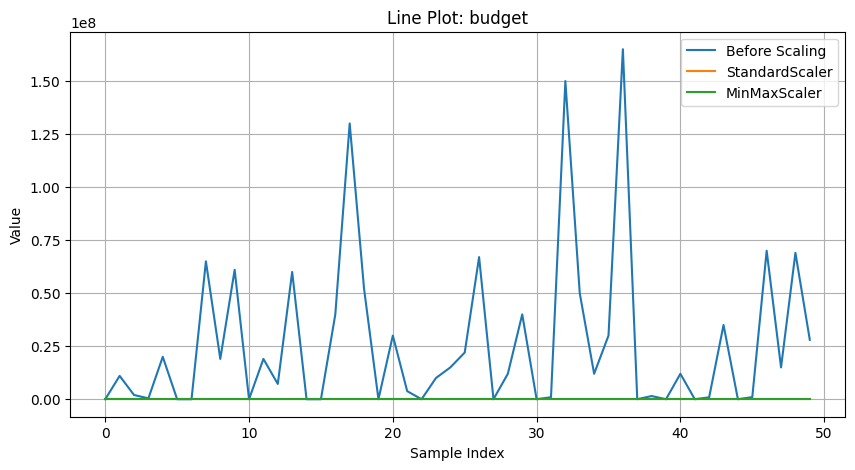

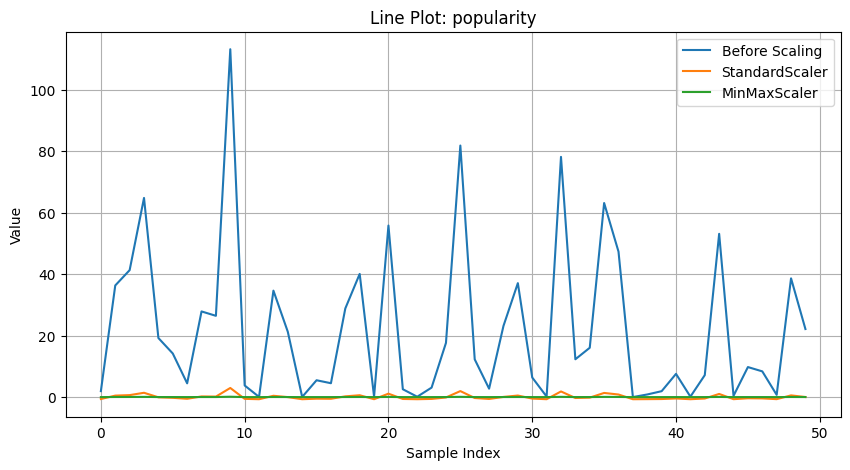

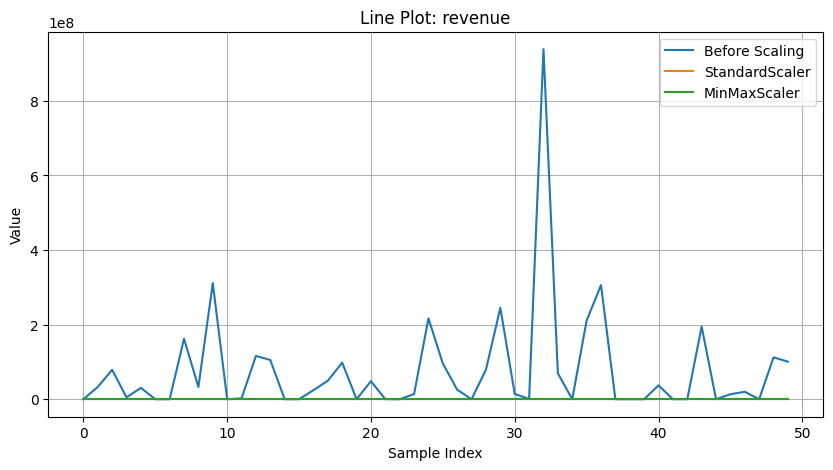

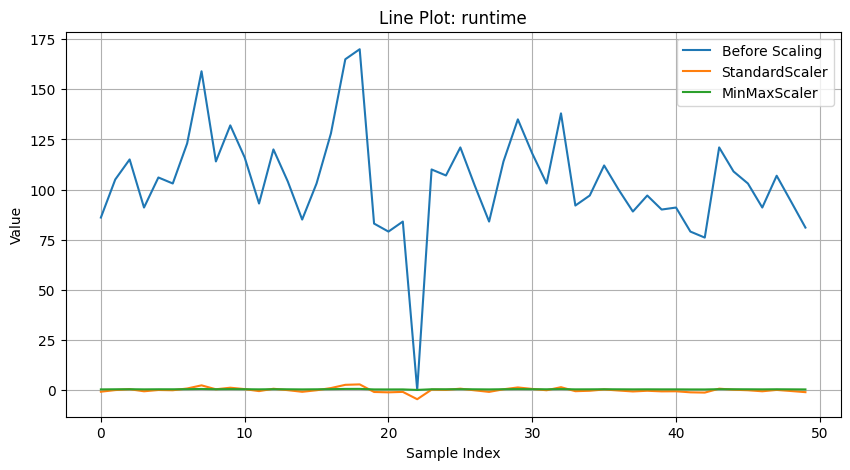

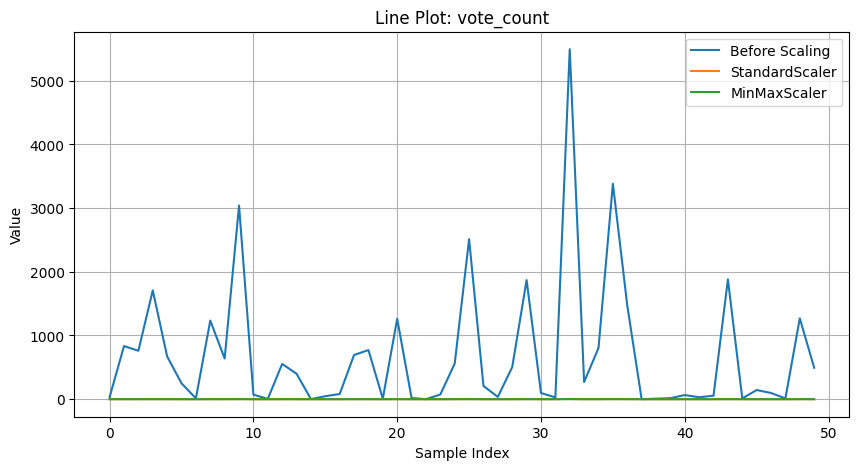

In [ ]:
for col in features:
    plt.figure(figsize=(10,5))

    plt.plot(X_train[col].values[:50], label="Before Scaling")
    plt.plot(X_train_scaled_df[col].values[:50], label="StandardScaler")
    plt.plot(X_train_mm_df[col].values[:50], label="MinMaxScaler")

    plt.title(f"Line Plot: {col}")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)

    plt.show()
